In [1]:
pip install cuml-cu11 dask-cudf-cu11 -f https://rapids.ai/pip/cu11

Looking in links: https://rapids.ai/pip/cu11

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy scikit-learn joblib matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from cuml.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [4]:
# Check for GPU availability
try:
    import cuml
    print("cuML is available. Using GPU acceleration.")
except ImportError:
    raise RuntimeError("cuML is not installed. Please install RAPIDS cuML for GPU-accelerated SVM.")

cuML is available. Using GPU acceleration.


In [5]:
# Loading Saved Data
print("Loading Saved Data")
train_features = np.load('train_features.npy')
train_labels = np.load('train_labels.npy')
test_features = np.load('test_features.npy')
test_labels = np.load('test_labels.npy')
val_features = np.load('val_features.npy')
val_labels = np.load('val_labels.npy')

print("Scaling Loaded Data")
scaler = joblib.load('scaler.pkl')
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

Loading Saved Data
Scaling Loaded Data


In [ ]:
print("Starting SVM training")
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(train_features, train_labels)
print("Training complete")

# Save the SVM model
joblib.dump(svm, 'svm_model_full.pkl')
print("SVM model saved.")

Starting SVM training
Training complete
SVM model saved.


Evaluating on validation data
Validation Accuracy: 0.9357
Evaluating on test data
Test Accuracy: 0.9355
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     19953
           1       0.94      0.95      0.94     27487

    accuracy                           0.94     47440
   macro avg       0.94      0.93      0.93     47440
weighted avg       0.94      0.94      0.94     47440



<Figure size 800x600 with 0 Axes>

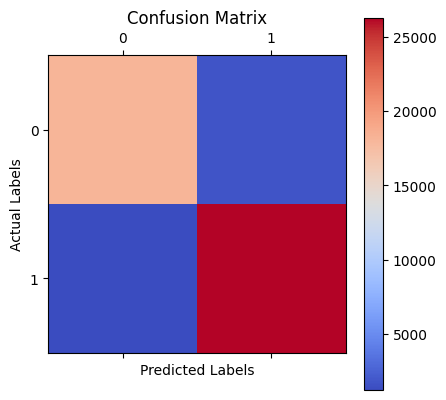

In [7]:
# Evaluate on validation data
print("Evaluating on validation data")
val_preds = svm.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test data
print("Evaluating on test data")
test_preds = svm.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report and confusion matrix
print("Classification Report on Test Set:")
print(classification_report(test_labels, test_preds))

conf_matrix = confusion_matrix(test_labels, test_preds)

# Save confusion matrix plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.savefig('confusion_matrix.png')
plt.show()



Balanced Performance:
Precision and recall are well-balanced for both classes, indicating the SVM model effectively handles class distributions.

High Generalization:
The close alignment between validation and test accuracies suggests minimal overfitting.

Strong Results for Positive Class (Class 1):
Slightly better recall for Class 1 suggests the model is more effective at identifying positive samples compared to negative ones.